In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import scipy
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import joblib


LABELS = ["Normal", "Fraud"]

In [3]:
data = pd.read_csv('creditcard.csv',sep=",")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().values.any()

False

C:\Users\mahad\AppData\Local\Temp\ipykernel_13276\1985030641.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'],sort=True)


Text(0, 0.5, 'Frequency')

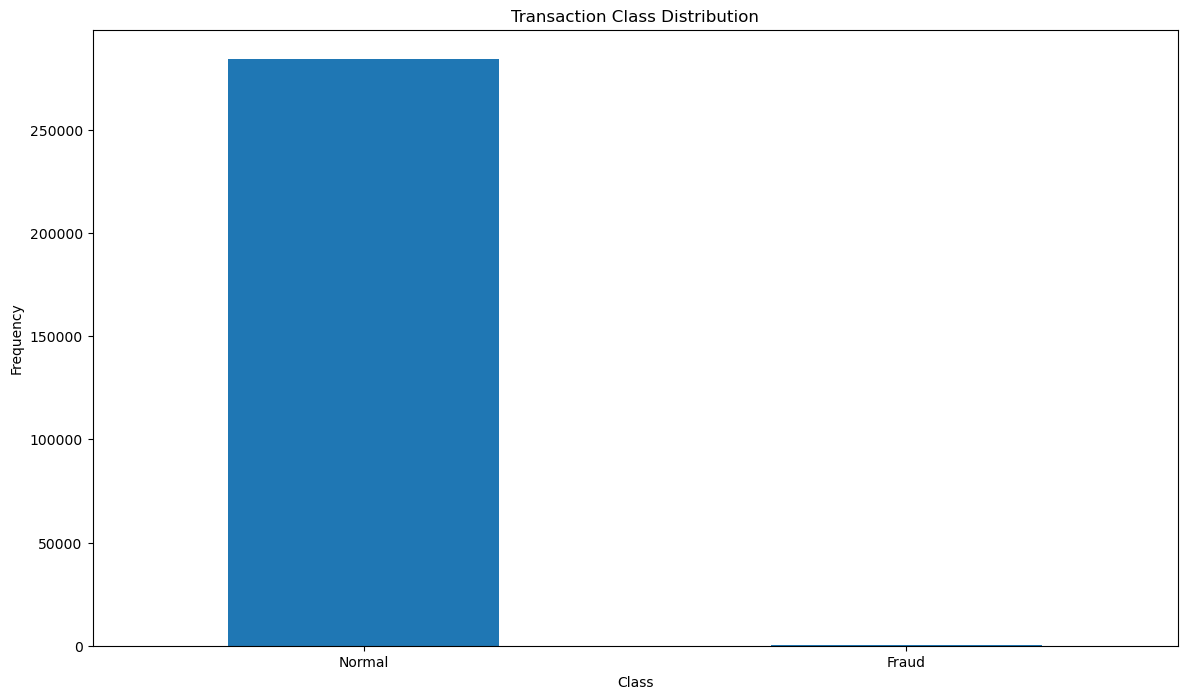

In [6]:
count_classes = pd.value_counts(data['Class'],sort=True)
count_classes.plot(kind = 'bar',rot=0) 
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [7]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [8]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

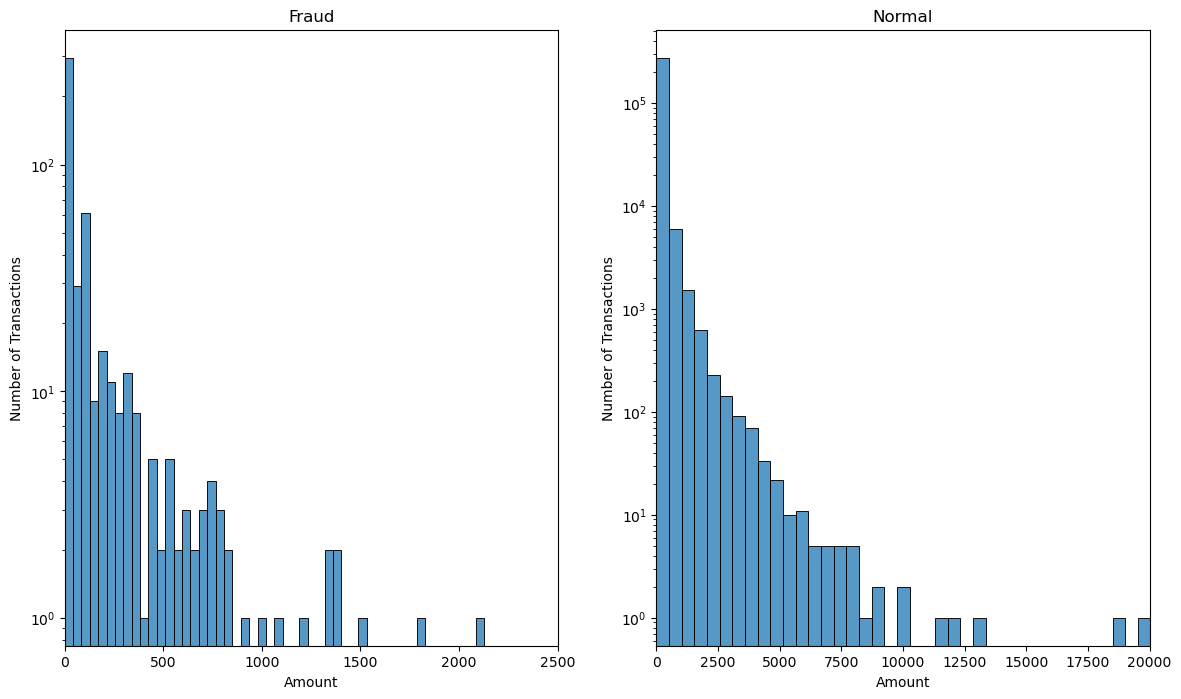

In [10]:
plt.subplot(1,2,1)
plt.title('Fraud')
bins = 50
sns.histplot(fraud.Amount,bins=bins)
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.xlim((0,2500))
plt.subplot(1,2,2)
plt.title('Normal')
bins = 50
sns.histplot(normal.Amount,bins=bins)
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.xlim((0,20000))
plt.show()


In [11]:
data_sam = data.sample(frac = 0.15,random_state=42)

data_sam.shape

(42721, 31)

In [12]:
Fraud = data_sam[data['Class']==1]
Valid = data_sam[data['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

C:\Users\mahad\AppData\Local\Temp\ipykernel_13276\4208077865.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fraud = data_sam[data['Class']==1]
C:\Users\mahad\AppData\Local\Temp\ipykernel_13276\4208077865.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Valid = data_sam[data['Class']==0]


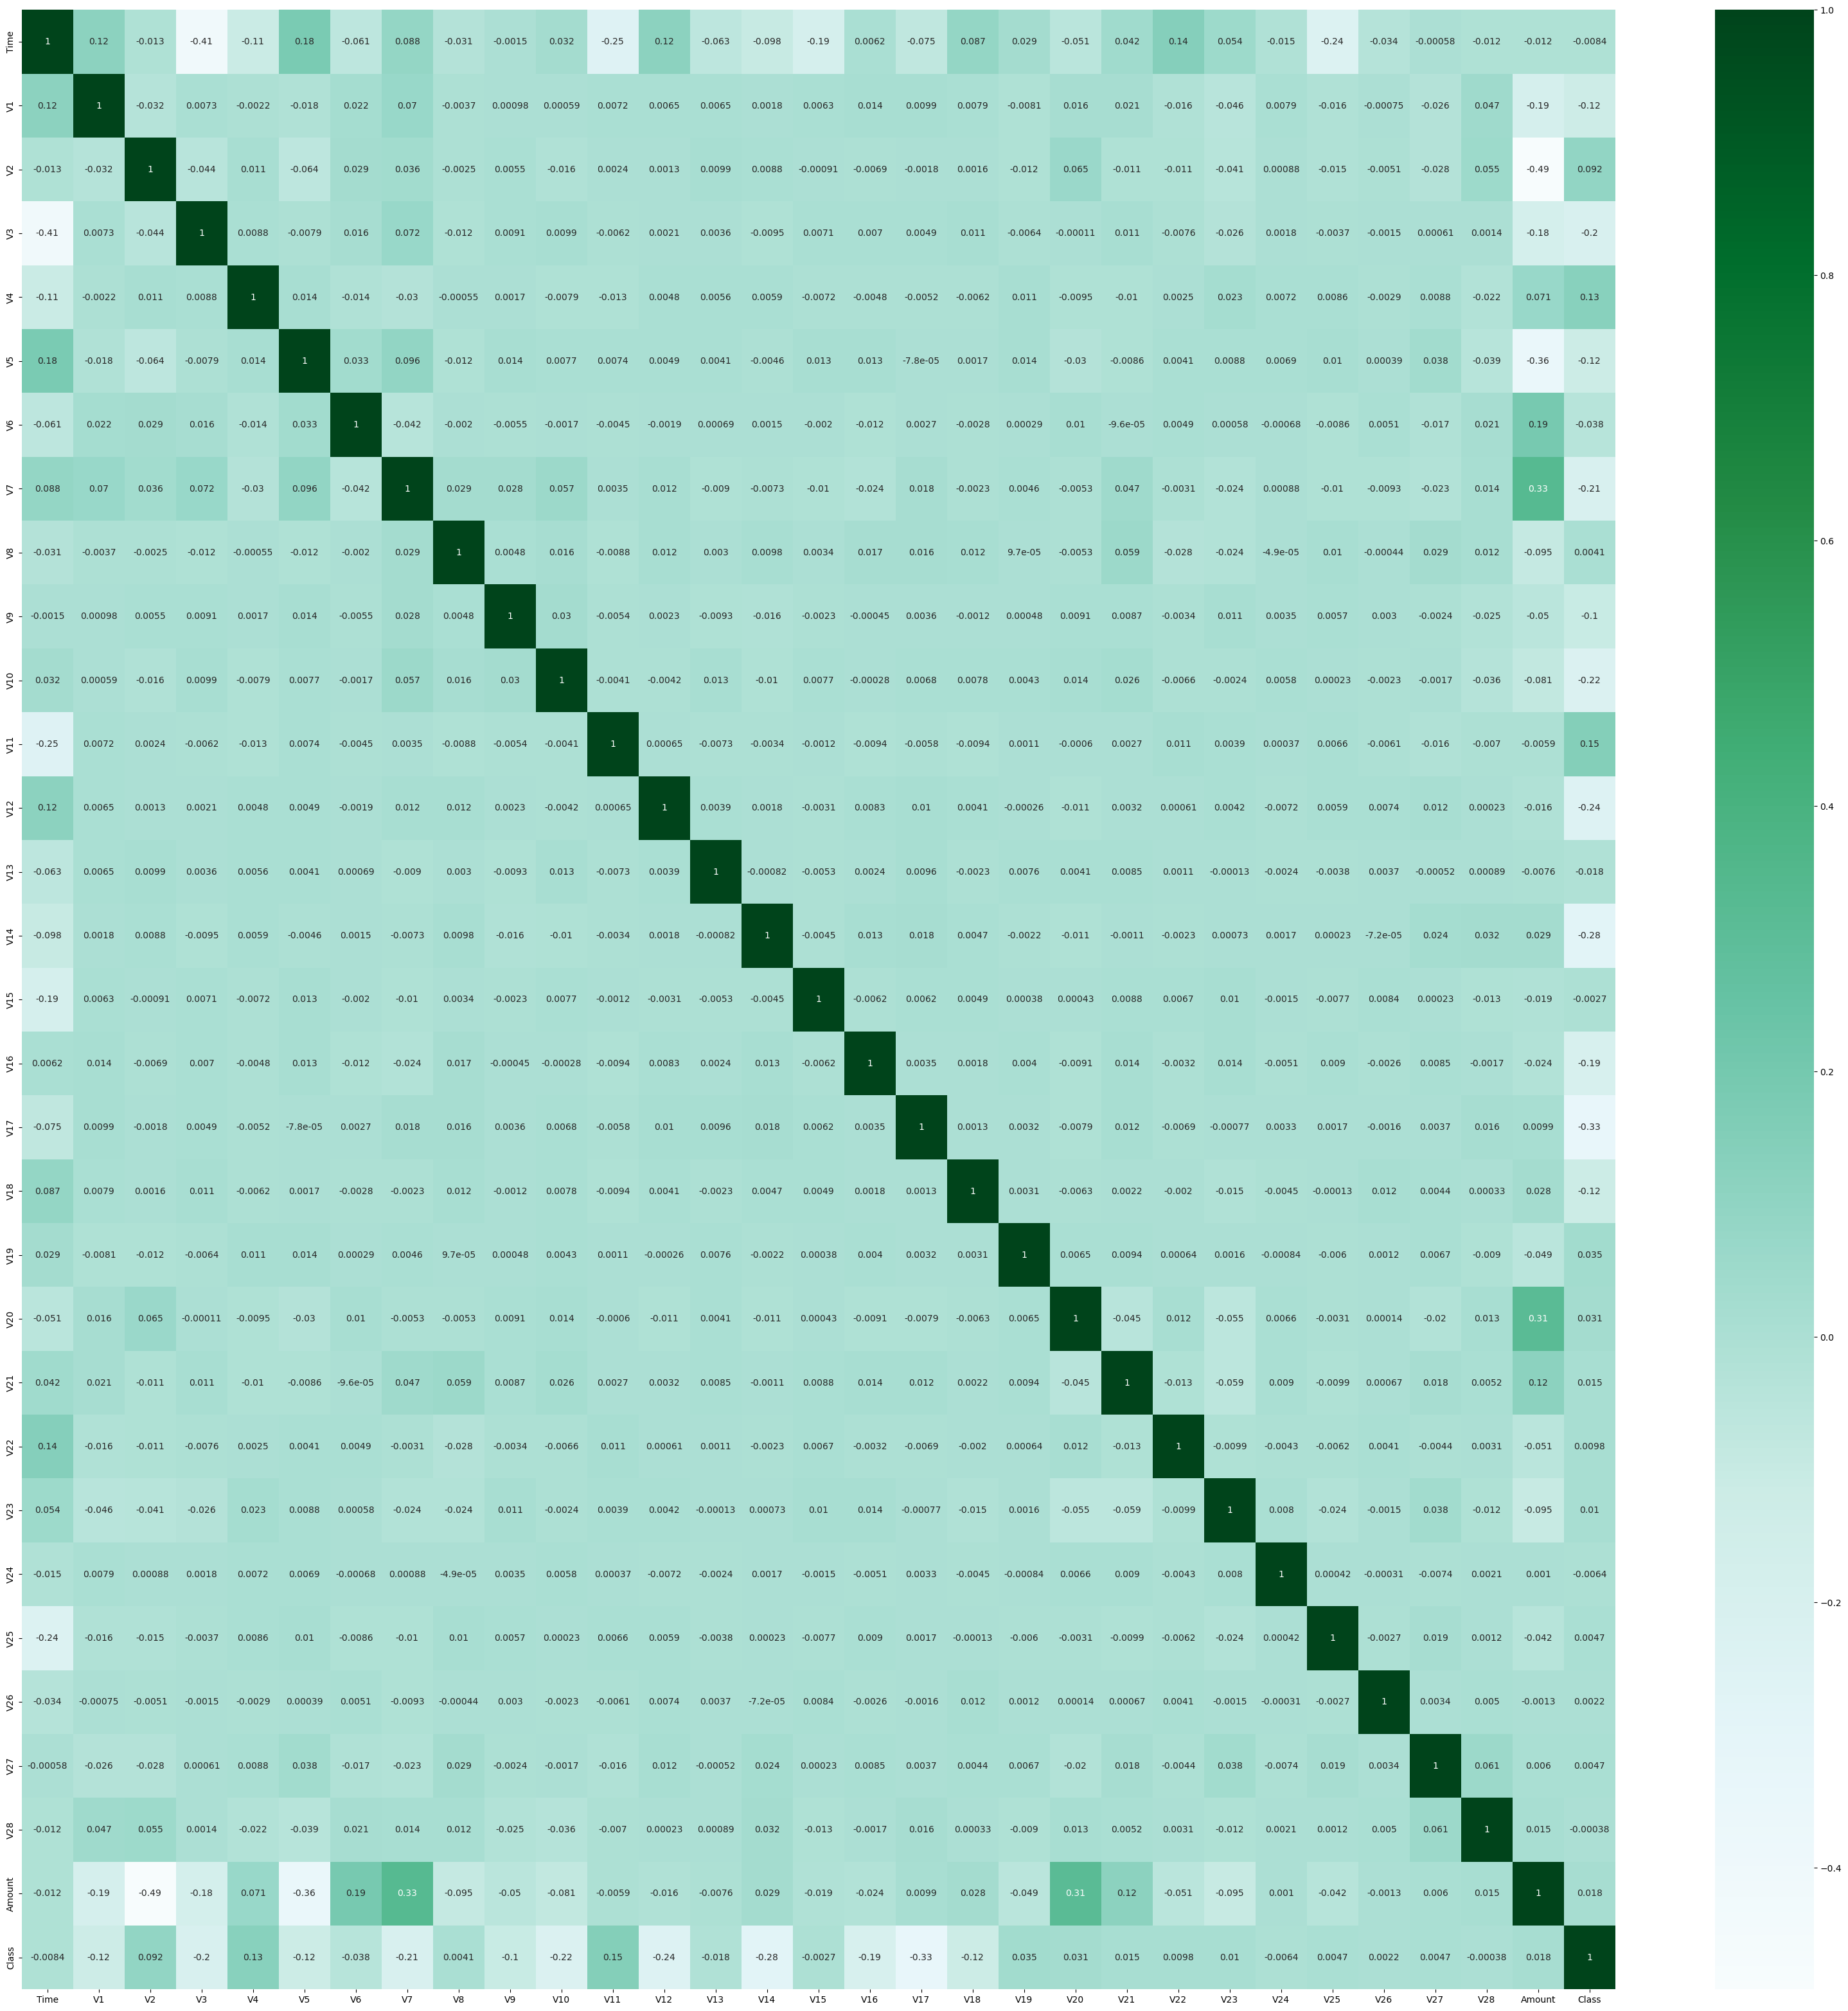

In [13]:
corr_data = data_sam.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr_data,annot=True,cmap='BuGn')
plt.show()

In [14]:
corr_data['Class'][corr_data['Class']>0.03].index

Index(['V2', 'V4', 'V11', 'V19', 'V20', 'Class'], dtype='object')

In [15]:
X = data_sam.drop(columns='Class')
y = data_sam['Class']

### Model Building

In [16]:
classifiers = {
    "Isolation Forest" : IsolationForest(n_estimators=100,max_samples=len(X),contamination=outlier_fraction,random_state=42,verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=30,metric='minkowski',p=2,metric_params=None,contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf',degree=3,gamma=0.1,nu=0.05,max_iter=-1)
}

In [17]:
type(classifiers)

dict

In [21]:
cols = data_sam.columns

for c in cols:
    print(f"{c} -- {data_sam[c].min()} to {data_sam[c].max()}")
    print("--------")

Time -- 0.0 to 172782.0
--------
V1 -- -34.1482336513529 to 2.43920748106102
--------
V2 -- -48.0608560248694 to 21.4672029942752
--------
V3 -- -33.6809840183525 to 9.38255843282114
--------
V4 -- -5.56011758115594 to 12.6995419865184
--------
V5 -- -23.669725685634 to 29.0161235360128
--------
V6 -- -20.8696261884133 to 16.4932270978583
--------
V7 -- -41.5067960832574 to 21.4375144649789
--------
V8 -- -50.4200900644342 to 19.1683273897301
--------
V9 -- -13.4340663182301 to 15.5949946071278
--------
V10 -- -24.4031849699728 to 23.7451361206545
--------
V11 -- -4.68293054765276 to 11.6197234753825
--------
V12 -- -18.4311310279993 to 4.84645240859009
--------
V13 -- -4.00863979207158 to 4.09935190487142
--------
V14 -- -18.8220867423816 to 7.75459874805484
--------
V15 -- -4.49894467676621 to 4.19858290437595
--------
V16 -- -13.2515419788937 to 4.73432149755933
--------
V17 -- -22.8839985767803 to 7.73345628377118
--------
V18 -- -9.28783221397402 to 4.09343995554214
--------
V19 -

In [22]:
n_outliers = len(Fraud)

for i, (c_name,c) in enumerate(classifiers.items()):
    if c_name == "Local Outlier Factor":
        y_pred = c.fit_predict(X)
        scores_prediction = c.negative_outlier_factor_
    elif c_name == "Support Vector Machine":
        c.fit(X)
        y_pred = c.predict(X)
    else:
        c.fit(X)
        scores_prediction = c.decision_function(X)
        y_pred = c.predict(X)
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1
    n_errors =(y_pred!=y).sum()

    print(f"{c_name} : {n_errors}")
    print("Accuracy Score:")
    print(accuracy_score(y,y_pred))
    print("Classification Report:")
    print(classification_report(y,y_pred))


Isolation Forest : 105
Accuracy Score:
0.997542192364411
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       0.29      0.30      0.30        74

    accuracy                           1.00     42721
   macro avg       0.65      0.65      0.65     42721
weighted avg       1.00      1.00      1.00     42721

Local Outlier Factor : 147
Accuracy Score:
0.9965590693101753
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       0.01      0.01      0.01        74

    accuracy                           1.00     42721
   macro avg       0.51      0.51      0.51     42721
weighted avg       1.00      1.00      1.00     42721

Support Vector Machine : 26026
Accuracy Score:
0.3907914140586597
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.39    

In [27]:
model = classifiers['Isolation Forest'].fit(X,y)
joblib.dump(model,'Fraud_predictor.pkl')


['Fraud_predictor.pkl']